<a href="https://colab.research.google.com/github/rajasafi/ML-Models/blob/main/Logistic%20Regression%20way/Logistic_Regression_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [ ]:
import matplotlib.pyplot as plt


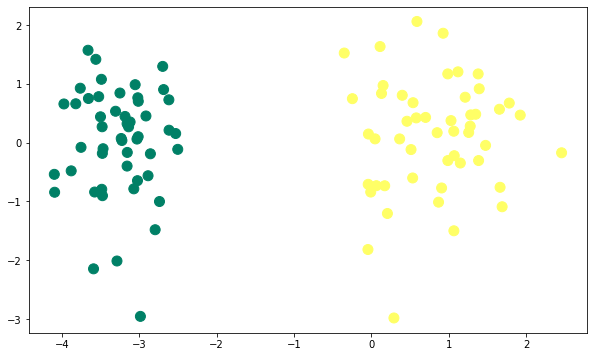

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer',s=100)

In [ ]:
# here we are removing regularization from logistic regression  because internally sklearn had already added regularization and 
#in our code we hadn't  use regularization
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(penalty='none', solver='sag')

In [ ]:
print(lor.coef_)
print(lor.intercept_)


[[4.79792494 0.21266636]]
[5.7675156]


In [ ]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [ ]:
def logistic_Regression_Gradient_Descent(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.5

    for i in range(4500):
      y_hat = sigmoid(np.dot(X,weights)) #doing y_hat prediction
      weights=weights + lr*(np.dot((y-y_hat),X)/X.shape[0]) #applying gradient descent after finding formula
    
    return weights[1:],weights[0] # weights[1:] it return  coefficient , weights[0] it will return intercept value

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
coef_,intercept_ = logistic_Regression_Gradient_Descent(X,y)

In [ ]:
m = -(coef_[0]/coef_[1])   #ax+by+c=0
                            # m= -a/b , b= -c/b
b = -(intercept_/coef_[1])

In [ ]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

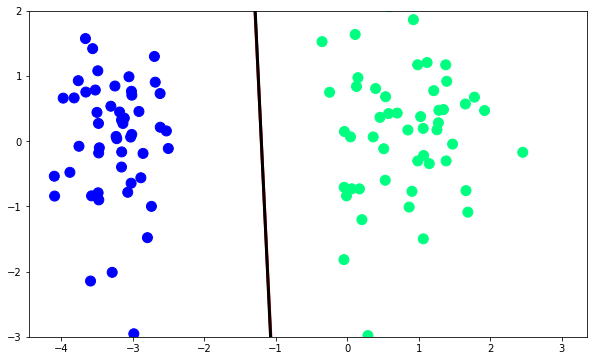

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)